In [1]:
# Loading Data and checking the data sets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("../data/raw/train.csv", index_col='id')
test_data = pd.read_csv("../data/raw/test.csv")

train_data.head(5)



,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [6]:
train_data.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [2]:
#Further analysis of data
y = train_data["exam_score"]
X = train_data.drop(columns="exam_score")

#categorical columns
cat_col = [col for col in X.columns if(X[col].dtype == 'object')]

#numerical columns
num_col = [col for col in X.columns if(X[col].dtype == 'int64' or X[col].dtype == 'float64')]

print(cat_col)
print(num_col)

['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
['age', 'study_hours', 'class_attendance', 'sleep_hours']


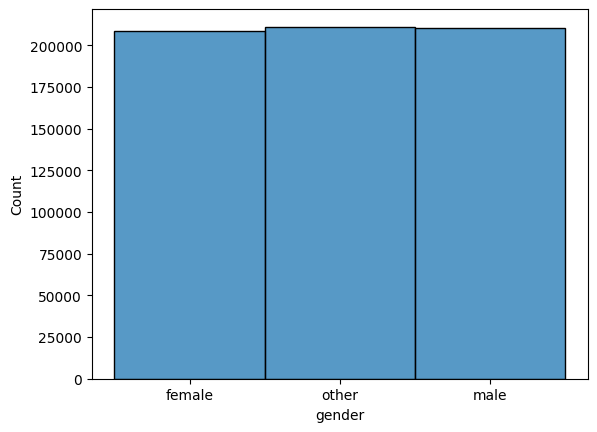

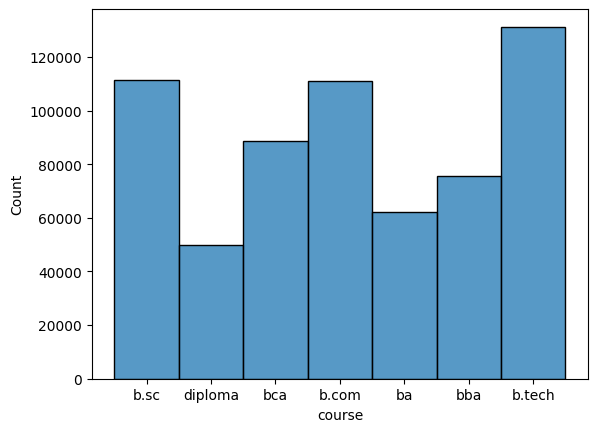

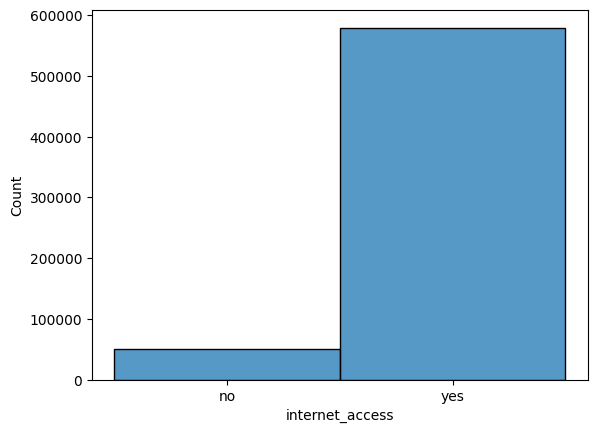

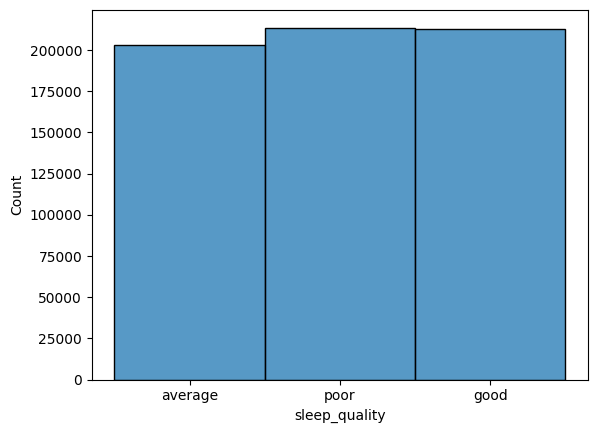

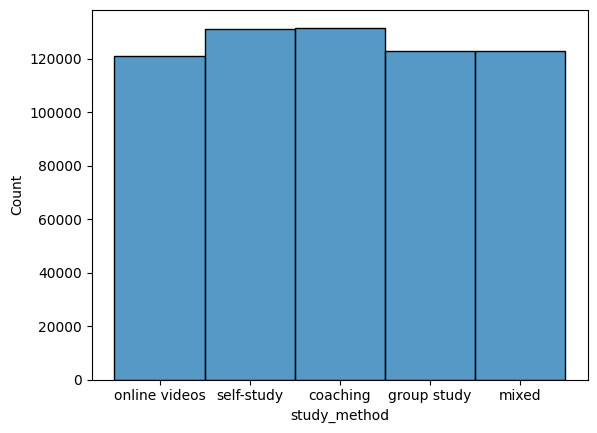

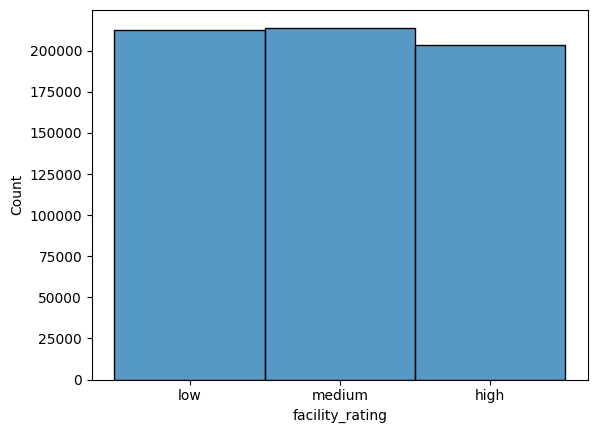

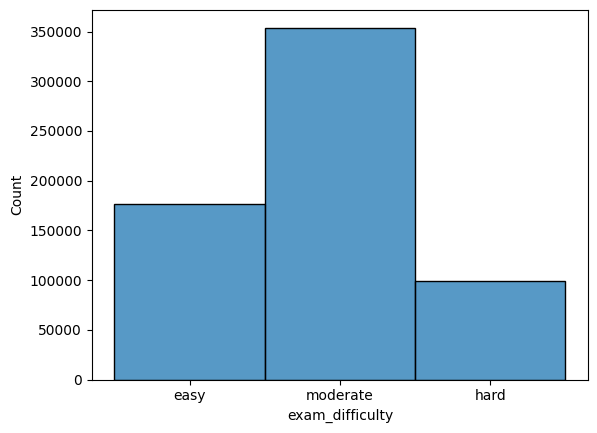

In [3]:
#Visualisation of categorical data
for col in cat_col:
    sns.histplot(x=col, data=X)
    plt.show()

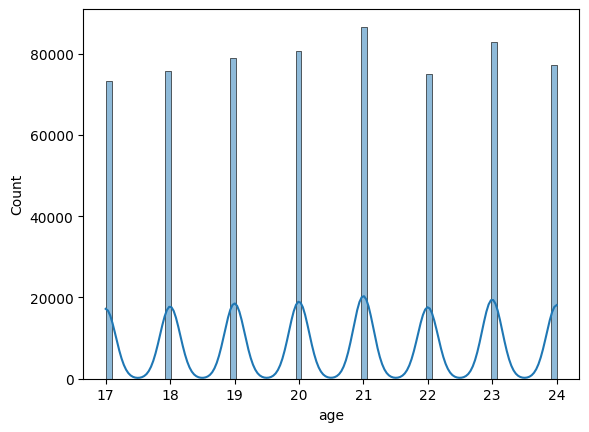

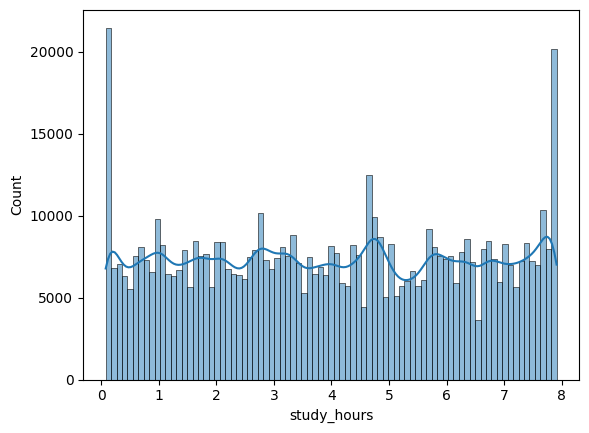

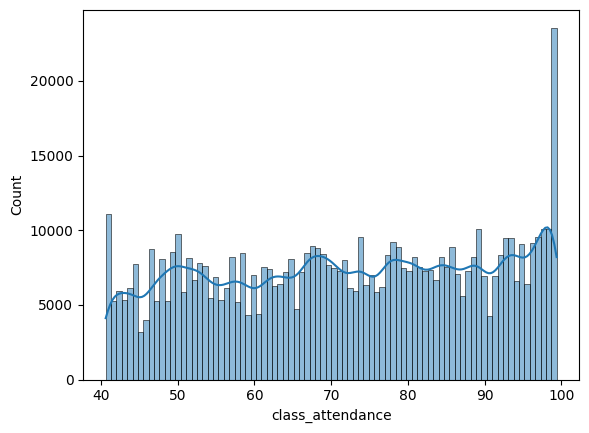

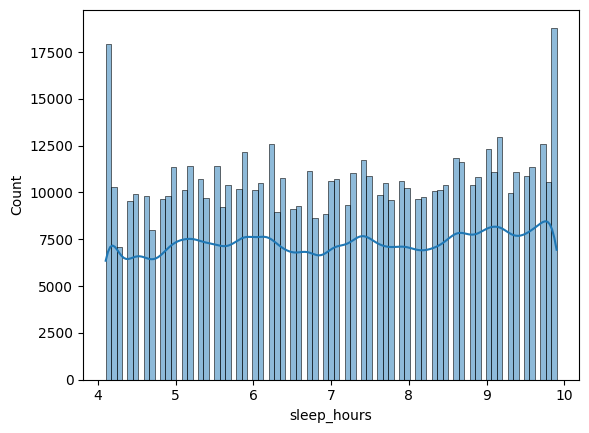

In [12]:
for col in num_col:
    sns.histplot(x=col, data=X, kde=True)
    plt.show()

In [4]:
#checking imbalance in column "internet_access"
total = X["internet_access"].count()
individual = X["internet_access"].value_counts()

percent = individual/ total * 100

print(percent)

internet_access
yes    91.971905
no      8.028095
Name: count, dtype: float64


In [5]:
# Finding correlation of features with output

corr = X[num_col].corrwith(y)
print(corr)

age                 0.010472
study_hours         0.762267
class_attendance    0.360954
sleep_hours         0.167410
dtype: float64


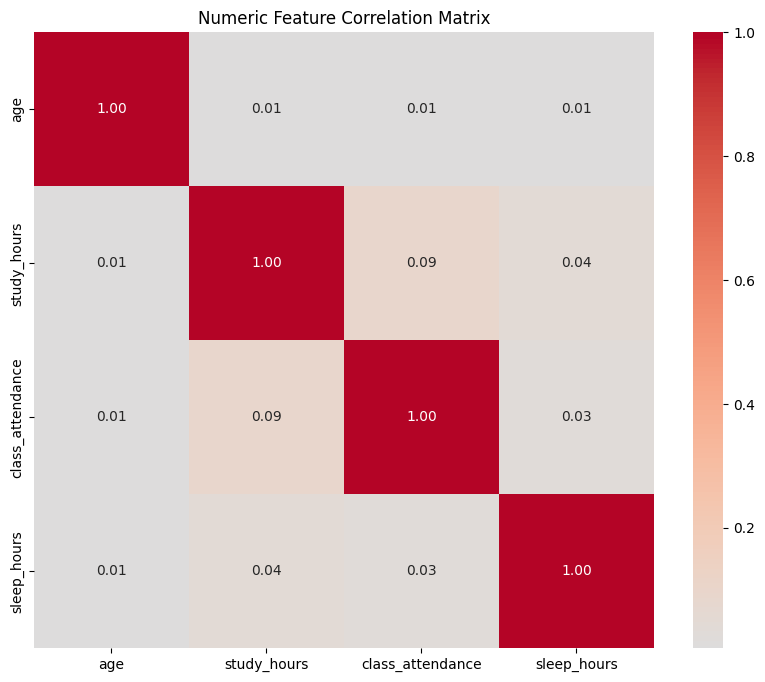

In [6]:
corr_matrix = X[num_col].corr()

# Plotting the data for better understanding 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot = True, fmt = '.2f')
plt.title("Numeric Feature Correlation Matrix")
plt.show()